# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [44]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

 # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [47]:
# Set the API base URL
weather_url = "https://api.openweathermap.org/data/2.5/weather?"
weather_api_key = "2afb6d2cc321f696697467671129ed84"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    units = "metric"
    city_url = f"{weather_url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(city_url)
        city_weather = weather_response.json()

        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kodiak
Processing Record 2 of Set 1 | east london
Processing Record 3 of Set 1 | guozhen
Processing Record 4 of Set 1 | sao jose da coroa grande
Processing Record 5 of Set 1 | port elizabeth
Processing Record 6 of Set 1 | luganville
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | sedro-woolley
Processing Record 9 of Set 1 | invercargill
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | shimoda
Processing Record 12 of Set 1 | port saint john's
Processing Record 13 of Set 1 | zangguy
City not found. Skipping...
Processing Record 14 of Set 1 | severo-yeniseyskiy
Processing Record 15 of Set 1 | blackmans bay
Processing Record 16 of Set 1 | okha
Processing Record 17 of Set 1 | college
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | zouerate
Processing Record 20 of Set 1 | waitangi
Processing Record 21 of Set 1 | edinburgh of the

In [48]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =  pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [49]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kodiak,57.7900,-152.4072,10.73,87,100,2.57,US,1721318533
1,east london,-33.0153,27.9116,18.52,68,0,7.20,ZA,1721318535
2,guozhen,34.3659,107.3590,24.97,84,79,1.68,CN,1721318537
3,sao jose da coroa grande,-8.8978,-35.1478,26.26,70,35,4.70,BR,1721318539
4,port elizabeth,-33.9180,25.5701,16.72,71,0,6.17,ZA,1721318541


In [50]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [51]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kodiak,57.7900,-152.4072,10.73,87,100,2.57,US,1721318533
1,east london,-33.0153,27.9116,18.52,68,0,7.20,ZA,1721318535
2,guozhen,34.3659,107.3590,24.97,84,79,1.68,CN,1721318537
3,sao jose da coroa grande,-8.8978,-35.1478,26.26,70,35,4.70,BR,1721318539
4,port elizabeth,-33.9180,25.5701,16.72,71,0,6.17,ZA,1721318541


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

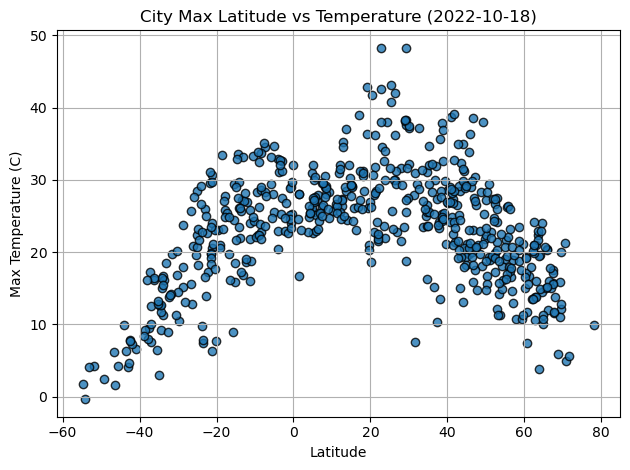

In [53]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"],alpha=0.8, edgecolor="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Max Latitude vs Temperature (2022-10-18)")
plt.grid()
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

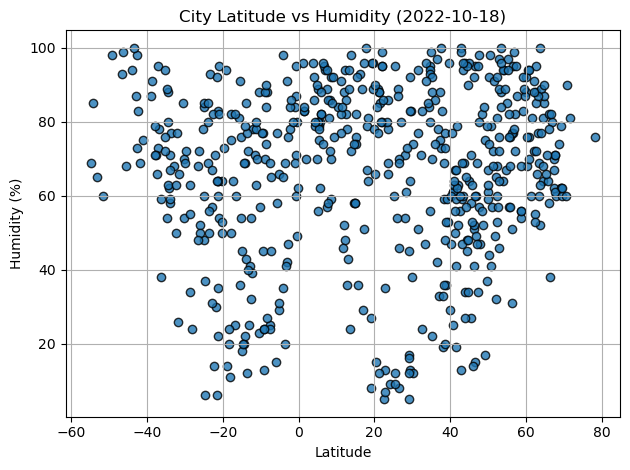

In [55]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha=0.8, edgecolor="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity (2022-10-18)")
plt.grid()
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

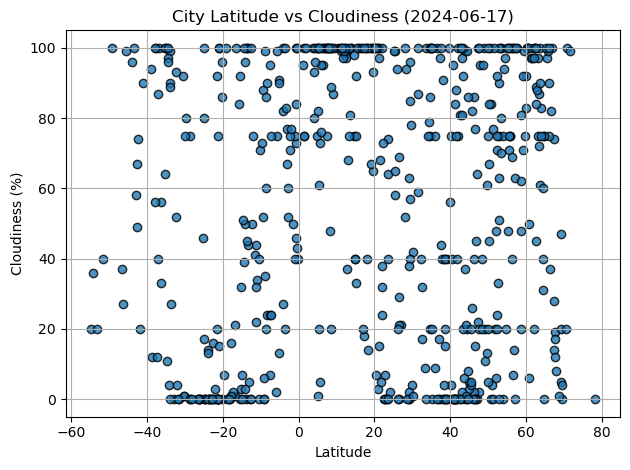

In [57]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha=0.8, edgecolor="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness (2024-06-17)")
plt.grid()
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

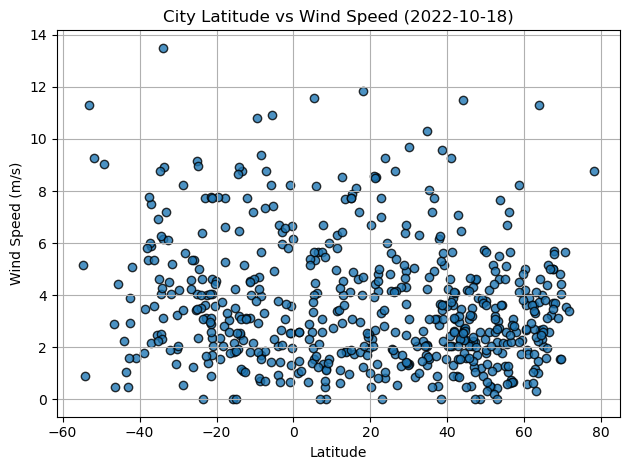

In [59]:
# Build the scatter plots for latitude vs. wind speed

plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha=0.8, edgecolor="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs Wind Speed (2022-10-18)")
plt.grid()
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [61]:
# Define a function to create Linear Regression plots

def plot_linear_regression(x_values, y_values, x_label, y_label, title, filename):
     slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

     regress_values = x_values * slope + intercept
     line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
     plt.scatter(x_values, y_values, alpha=0.8, edgecolors="k")

     plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=15, color="red")
    
     plt.xlabel(x_label)
     plt.ylabel(y_label)
     plt.title(title)
    
     plt.grid()
     plt.tight_layout()

     plt.savefig(filename)
    
     plt.show()

In [62]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kodiak,57.7900,-152.4072,10.73,87,100,2.57,US,1721318533
2,guozhen,34.3659,107.3590,24.97,84,79,1.68,CN,1721318537
6,bethel,41.3712,-73.4140,27.33,67,0,3.60,US,1721318280
7,sedro-woolley,48.5039,-122.2361,19.75,82,40,0.00,US,1721318547
10,shimoda,34.6667,138.9500,25.61,95,100,4.25,JP,1721318553


In [63]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,east london,-33.0153,27.9116,18.52,68,0,7.20,ZA,1721318535
3,sao jose da coroa grande,-8.8978,-35.1478,26.26,70,35,4.70,BR,1721318539
4,port elizabeth,-33.9180,25.5701,16.72,71,0,6.17,ZA,1721318541
5,luganville,-15.5333,167.1667,24.43,91,92,2.16,VU,1721318543
8,invercargill,-46.4000,168.3500,1.68,99,27,0.45,NZ,1721318549


###  Temperature vs. Latitude Linear Regression Plot

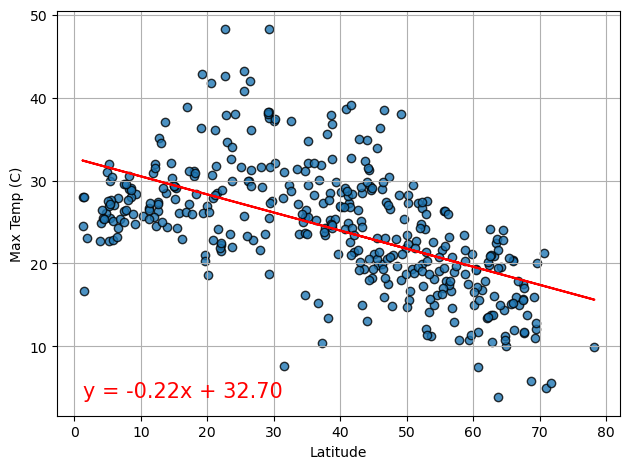

In [65]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.scatter(x_values, y_values, alpha=0.8, edgecolors="k")
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.grid()
plt.tight_layout()

plt.savefig("output_data/Northern_Hemisphere_Lat_vs_Temp.png")
plt.show()

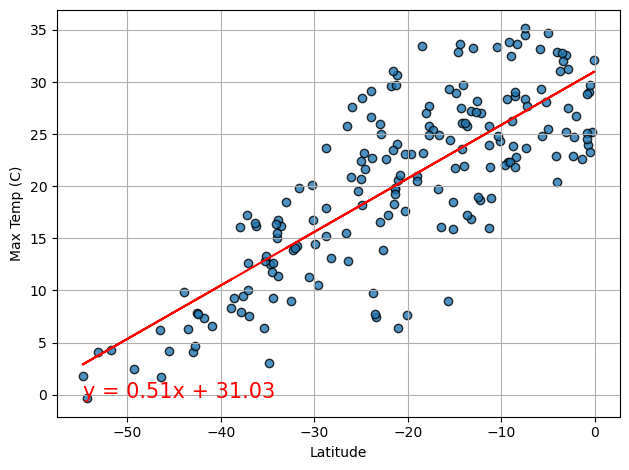

In [66]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.scatter(x_values, y_values, alpha=0.8, edgecolors="k")
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.grid()
plt.tight_layout()

plt.savefig("output_data/Southern_Hemisphere_Lat_vs_Temp.png")
plt.show()


**Discussion about the linear relationship:** Latitude significantly affects maximum temperature in both hemispheres, but in opposite directions. In the southern hemisphere, maximum temperature increases as latitude decreases (moving towards the equator), indicating a strong positive relationship. Conversely, in the northern hemisphere, maximum temperature decreases as latitude increases (moving away from the equator), showing a moderate negative relationship. Despite latitude being a key factor, the scatter in both plots suggests that other variables also influence maximum temperature.

### Humidity vs. Latitude Linear Regression Plot

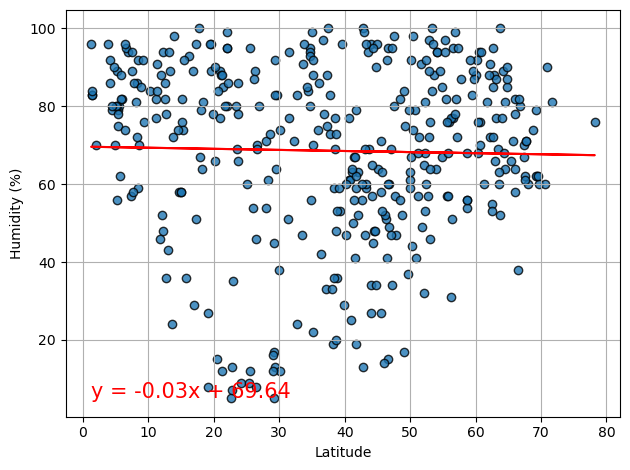

In [69]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.scatter(x_values, y_values, alpha=0.8, edgecolors="k")
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.tight_layout()

plt.savefig("output_data/Northern_Hemisphere_Lat_vs_Humidity.png")
plt.show()

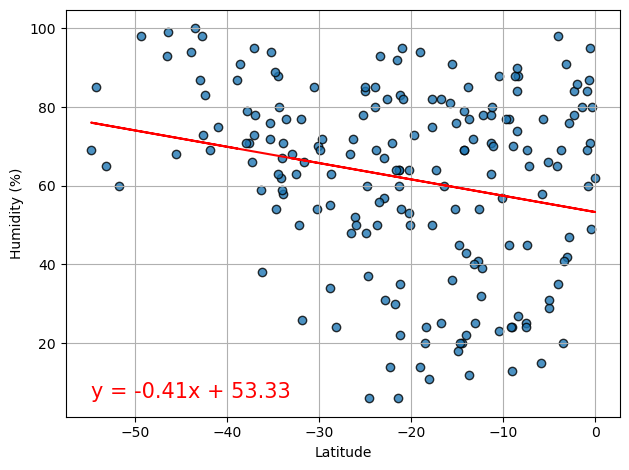

In [70]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.scatter(x_values, y_values, alpha=0.8, edgecolors="k")
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.tight_layout()

plt.savefig("output_data/Northern_Hemisphere_Lat_vs_Humidity.png")
plt.show()

**Discussion about the linear relationship:** Both plot scratters indicates that latitude has a negative influence on humidity in both hemispheres, with a more noticeable effect in the southern hemisphere. In the northern hemisphere, the relationship is very weak, suggesting that latitude alone does not significantly explain the variability in humidity. The scatter of data points in both plots highlights the complexity of humidity patterns, influenced by multiple factors beyond latitude.

### Cloudiness vs. Latitude Linear Regression Plot

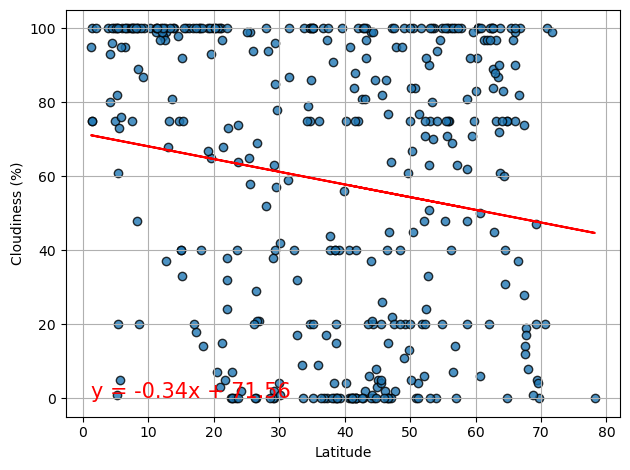

In [73]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.scatter(x_values, y_values, alpha=0.8, edgecolors="k")
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.tight_layout()

plt.savefig("output_data/Northern_Hemisphere_Lat_vs_Cloudiness.png")
plt.show()

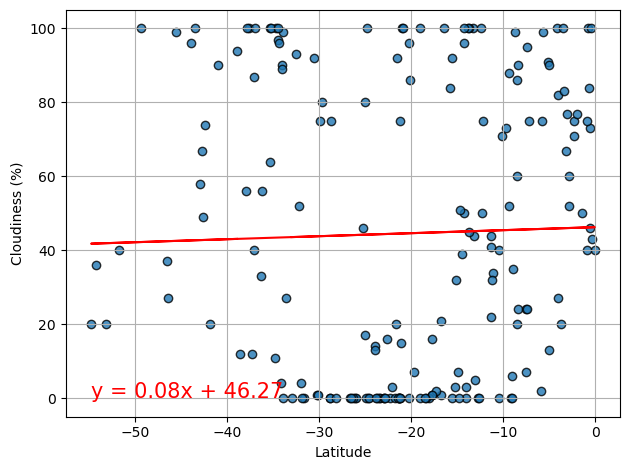

In [74]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.scatter(x_values, y_values, alpha=0.8, edgecolors="k")
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.tight_layout()

plt.savefig("output_data/Northern_Hemisphere_Lat_vs_Cloudiness.png")
plt.show()

**Discussion about the linear relationship:** The analysis suggests that latitude has a more noticeable influence on cloudiness in the northern hemisphere, with cloudiness decreasing as latitude increases. In contrast, in the southern hemisphere, latitude has a minimal impact on cloudiness, with a very slight increase in cloudiness as latitude increases. However, in both cases, the scatter of data points indicates that cloudiness is influenced by multiple factors, and latitude alone does not provide a strong explanation for the variability in cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

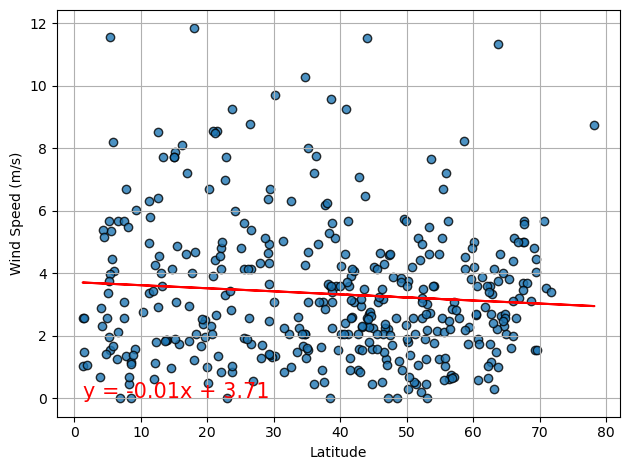

In [77]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.scatter(x_values, y_values, alpha=0.8, edgecolors="k")
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()
plt.tight_layout()

plt.savefig("output_data/Northern_Hemisphere_Lat_vs_Wind_Speed.png")
plt.show()

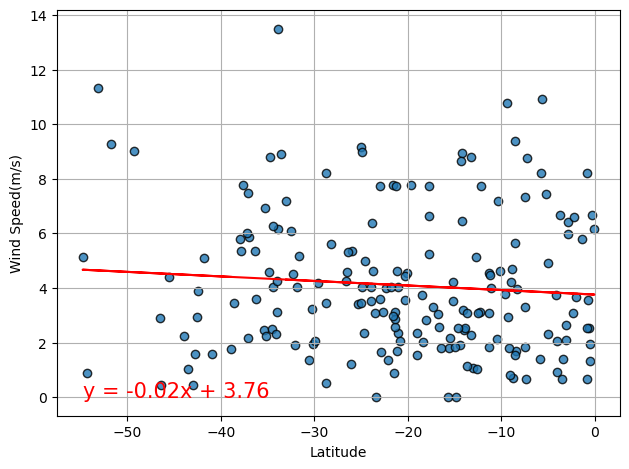

In [78]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.scatter(x_values, y_values, alpha=0.8, edgecolors="k")
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")
plt.grid()
plt.tight_layout()

plt.savefig("output_data/Northern_Hemisphere_Lat_vs_Wind_Speed.png")
plt.show()

**Discussion about the linear relationship:** In both scatter plots suggest that latitude has a very weak influence on wind speed in both the northern and southern hemispheres. The slightly stronger negative slope in the southern hemisphere may indicate a marginally more noticeable trend, but the relationship remains weak in both cases.